<a href="https://colab.research.google.com/github/Meson123/Mumbai_Weather_SURP/blob/main/SURP_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload Code

In [1]:
import pandas as pd
github_url = "https://github.com/Meson123/Mumbai_Weather_SURP/releases/download/v2024.12/Mumbai_Kriging_Temp.csv"
csv_filename = "Mumbai_Kriging_Temp.csv"
!wget -q -O {csv_filename} {github_url}

# Load the CSV into a Pandas DataFrame
df = pd.read_csv(csv_filename)

# Display the first few rows of the dataset
print("Dataset loaded successfully!")
df.head()


Dataset loaded successfully!


,Time Series,Kriging_Andheri,Kriging_B ward,Kriging_Bandra,Kriging_Bhagawati Hospital,Kriging_Bhandup,Kriging_BKC 1,Kriging_BMC 1,Kriging_BMC 2,Kriging_Borivali,...,Kriging_Thakare natya,Kriging_Versova pumping,Kriging_Vikroli Building Proposal,Kriging_Vikhroli,Kriging_vileparle W,Kriging_Vileparle-WL,Kriging_Wadala,Kriging_Worli Data Center,Kriging_Workshop Kandivali,Kriging_Worli
0,01-01-2009 00:15,22.3,23.067179,22.3,22.692272,23.5,22.8,23.2,22.792198,21.4,...,22.693277,22.689499,21.7,20.6,22.691434,22.692614,21.7,22.694243,22.693124,22.7
1,01-01-2009 00:30,22.1,22.937443,22.2,22.502117,23.7,22.4,23.1,22.566841,21.3,...,22.502674,22.500517,21.6,20.4,22.501653,22.502285,21.6,22.503193,22.502587,22.9
2,01-01-2009 00:45,22.0,22.628979,22.2,22.351512,24.1,22.1,23.1,22.356014,20.9,...,22.351718,22.350979,21.3,20.3,22.351382,22.351597,21.5,22.351904,22.351681,23.1
3,01-01-2009 01:00,21.8,22.540926,22.2,22.176537,24.1,21.8,23.1,22.180683,20.7,...,22.176815,22.175879,21.0,20.1,22.176381,22.176677,21.4,22.177074,22.176762,22.9
4,01-01-2009 01:15,21.6,22.365759,22.3,22.010441,23.8,21.5,22.9,22.010415,20.6,...,22.010716,22.009820,20.7,20.1,22.010316,22.010584,21.2,22.011013,22.010661,22.8


In [2]:
!pip install pykrige opencage matplotlib pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.7/909.7 kB 19.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
from opencage.geocoder import OpenCageGeocode
import warnings
import time

Extract coordinates for given cities using OpenCage Geocoder
    
    Parameters:
    - city_names: List of city names
    - api_key: OpenCage API key
    
    Returns:
    - Tuple of (latitudes, longitudes)

In [4]:
# OpenCage API Key
api_key = '45dd4f4d077d481f96b613a7369dd11f'

# File Path
file_path = r'D:\Kartikee_IITB\COLLEGE material\Others\SURP\Temperature\Mumbai_with_Kriging_Real.csv'

# Target coordinates (Mumbai)
target_lon = 72.8697
target_lat = 19.0365


In [5]:
# Load the dataset into Pandas DataFrame
data_df = pd.read_csv(csv_filename)
data_df.iloc[:, 0] = pd.to_datetime(data_df.iloc[:, 0], format='%d-%m-%Y %H:%M')
# Extract station names (temperature columns) starting from index 1
station_cols = list(data_df.columns[1:])
print("Dataset loaded successfully!")
data_df.head()

Dataset loaded successfully!


,Time Series,Kriging_Andheri,Kriging_B ward,Kriging_Bandra,Kriging_Bhagawati Hospital,Kriging_Bhandup,Kriging_BKC 1,Kriging_BMC 1,Kriging_BMC 2,Kriging_Borivali,...,Kriging_Thakare natya,Kriging_Versova pumping,Kriging_Vikroli Building Proposal,Kriging_Vikhroli,Kriging_vileparle W,Kriging_Vileparle-WL,Kriging_Wadala,Kriging_Worli Data Center,Kriging_Workshop Kandivali,Kriging_Worli
0,2009-01-01 00:15:00,22.3,23.067179,22.3,22.692272,23.5,22.8,23.2,22.792198,21.4,...,22.693277,22.689499,21.7,20.6,22.691434,22.692614,21.7,22.694243,22.693124,22.7
1,2009-01-01 00:30:00,22.1,22.937443,22.2,22.502117,23.7,22.4,23.1,22.566841,21.3,...,22.502674,22.500517,21.6,20.4,22.501653,22.502285,21.6,22.503193,22.502587,22.9
2,2009-01-01 00:45:00,22.0,22.628979,22.2,22.351512,24.1,22.1,23.1,22.356014,20.9,...,22.351718,22.350979,21.3,20.3,22.351382,22.351597,21.5,22.351904,22.351681,23.1
3,2009-01-01 01:00:00,21.8,22.540926,22.2,22.176537,24.1,21.8,23.1,22.180683,20.7,...,22.176815,22.175879,21.0,20.1,22.176381,22.176677,21.4,22.177074,22.176762,22.9
4,2009-01-01 01:15:00,21.6,22.365759,22.3,22.010441,23.8,21.5,22.9,22.010415,20.6,...,22.010716,22.009820,20.7,20.1,22.010316,22.010584,21.2,22.011013,22.010661,22.8


In [6]:
# Initialize OpenCage Geocoder
geocoder = OpenCageGeocode(api_key)

# Extract coordinates for stations
latitudes = [None] * len(station_cols)
longitudes = [None] * len(station_cols)

for i, city in enumerate(station_cols):
    print(f"Getting coordinates for {city}...")
    try:
        location = geocoder.geocode(f"{city}, Mumbai, India")
        if location and isinstance(location, list) and len(location) > 0:
            latitudes[i] = location[0]['geometry']['lat']
            longitudes[i] = location[0]['geometry']['lng']
            print(f"Coordinates for {city}: {latitudes[i]}, {longitudes[i]}")
        else:
            print(f"Could not find coordinates for {city}.")
    except Exception as e:
        print(f"Error occurred while getting coordinates for {city}: {e}")

    time.sleep(1)  # To avoid hitting rate limits

latitudes, longitudes  # Check the results


Getting coordinates for Kriging_Andheri...
Coordinates for Kriging_Andheri: 19.07283, 72.88261
Getting coordinates for Kriging_B ward...
Coordinates for Kriging_B ward: 19.07283, 72.88261
Getting coordinates for Kriging_Bandra...
Coordinates for Kriging_Bandra: 19.07283, 72.88261
Getting coordinates for Kriging_Bhagawati Hospital...
Coordinates for Kriging_Bhagawati Hospital: 19.07283, 72.88261
Getting coordinates for Kriging_Bhandup...
Coordinates for Kriging_Bhandup: 19.07283, 72.88261
Getting coordinates for Kriging_BKC 1...
Coordinates for Kriging_BKC 1: 19.07283, 72.88261
Getting coordinates for Kriging_BMC 1...
Coordinates for Kriging_BMC 1: 19.07283, 72.88261
Getting coordinates for Kriging_BMC 2...
Coordinates for Kriging_BMC 2: 19.07283, 72.88261
Getting coordinates for Kriging_Borivali...
Coordinates for Kriging_Borivali: 19.07283, 72.88261
Getting coordinates for Kriging_Britania Pumping...
Coordinates for Kriging_Britania Pumping: 19.07283, 72.88261
Getting coordinates for 

([19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  18.96667,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  18.90694,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.05,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  18.90694,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.07283,
  19.01667,
  19.07283,
  19.07283,
  19.01667],
 [72.88261,
  72.88261,
  72.88261,
  72.88261,
  72.8

In [ ]:
# Quick diagnostic print
print(f"Total rows: {len(data_df)}")
print(f"Stations: {len(station_cols)}")
print(f"Sample row data types:\n{data_df[station_cols].dtypes}")
print(f"Sample row non-null counts:\n{data_df[station_cols].notna().sum()}")

Total rows: 213792
Stations: 79
Sample row data types:
Kriging_Andheri               float64
Kriging_B ward                float64
Kriging_Bandra                float64
Kriging_Bhagawati Hospital    float64
Kriging_Bhandup               float64
                               ...   
Kriging_Vileparle-WL          float64
Kriging_Wadala                float64
Kriging_Worli Data Center     float64
Kriging_Workshop Kandivali    float64
Kriging_Worli                 float64
Length: 79, dtype: object
Sample row non-null counts:
Kriging_Andheri               193502
Kriging_B ward                193502
Kriging_Bandra                193502
Kriging_Bhagawati Hospital    193502
Kriging_Bhandup               193502
                               ...  
Kriging_Vileparle-WL          193502
Kriging_Wadala                193502
Kriging_Worli Data Center     193502
Kriging_Workshop Kandivali    193502
Kriging_Worli                 193502
Length: 79, dtype: int64


In [19]:
# Suppress warnings
from datetime import datetime, date, time, timedelta

# Current date and time
now = datetime.now()
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Interpolation function
def perform_kriging_interpolation(data_df, station_cols, latitudes, longitudes):
    interpolated_results = []
    start_time = datetime.now()
    print(f"Interpolation started at: {start_time}")

    for index, row in data_df.iterrows():
        # Print progress periodically
        if index % 100 == 0:
            current_time = datetime.now()
            elapsed_time = current_time - start_time
            print(f"Processing row {index} at {current_time} (Elapsed: {elapsed_time})")

        # Collect non-NaN temperatures and coordinates
        temps = []
        valid_lats = []
        valid_lons = []

        for col in station_cols:
            temp = row[col]
            if not pd.isna(temp):
                temps.append(temp)
                valid_lats.append(latitudes[station_cols.index(col)])
                valid_lons.append(longitudes[station_cols.index(col)])

        # Skip if insufficient data
        if len(temps) < 2:
            interpolated_results.append(np.nan)
            continue

        # Add small jitter to coordinates
        lons_jittered = np.array(valid_lons) + np.random.normal(0, 1e-6, len(valid_lons))
        lats_jittered = np.array(valid_lats) + np.random.normal(0, 1e-6, len(valid_lats))

        try:
            # Perform Kriging
            OK = OrdinaryKriging(
                lons_jittered,
                lats_jittered,
                np.array(temps),
                variogram_model='gaussian'
            )

            # Calculate centroid for interpolation
            target_lon = np.mean(lons_jittered)
            target_lat = np.mean(lats_jittered)

            # Interpolate at centroid
            z_interpolated, _ = OK.execute('points', [target_lon], [target_lat])
            interpolated_results.append(z_interpolated[0])

        except Exception as e:
            print(f"Kriging failed for row {index} at {datetime.now()}: {e}")
            interpolated_results.append(np.mean(temps))  # Fallback to mean

    end_time = datetime.now()
    print(f"Interpolation completed at: {end_time}")
    print(f"Total interpolation time: {end_time - start_time}")

    return interpolated_results

# Perform interpolation
print("Starting interpolation process...")
interpolated_results = perform_kriging_interpolation(data_df, station_cols, latitudes, longitudes)

# Add interpolated results to dataframe
data_df['Interpolated_Temperature'] = interpolated_results

# Save to CSV
output_filename = 'interpolated_results.csv'
data_df.to_csv(output_filename, index=False)

print(f"Interpolation complete. Results saved to {output_filename}")



Starting interpolation process...
Interpolation started at: 2024-12-16 06:41:16.035002
Processing row 0 at 2024-12-16 06:41:18.170002 (Elapsed: 0:00:02.135000)
Processing row 100 at 2024-12-16 06:41:21.110968 (Elapsed: 0:00:05.075966)
Processing row 200 at 2024-12-16 06:41:22.132107 (Elapsed: 0:00:06.097105)
Processing row 300 at 2024-12-16 06:41:23.222613 (Elapsed: 0:00:07.187611)
Processing row 400 at 2024-12-16 06:41:24.424766 (Elapsed: 0:00:08.389764)
Processing row 500 at 2024-12-16 06:41:25.540184 (Elapsed: 0:00:09.505182)
Processing row 600 at 2024-12-16 06:41:26.586236 (Elapsed: 0:00:10.551234)
Processing row 700 at 2024-12-16 06:41:27.694803 (Elapsed: 0:00:11.659801)
Processing row 800 at 2024-12-16 06:41:28.677288 (Elapsed: 0:00:12.642286)
Processing row 900 at 2024-12-16 06:41:29.815219 (Elapsed: 0:00:13.780217)
Processing row 1000 at 2024-12-16 06:41:31.626106 (Elapsed: 0:00:15.591104)
Processing row 1100 at 2024-12-16 06:41:34.578756 (Elapsed: 0:00:18.543754)
Processing ro

In [20]:
data_df = pd.read_csv('interpolated_results.csv')
data_df.head

<bound method NDFrame.head of                 Time Series  Kriging_Andheri  Kriging_B ward  Kriging_Bandra  \
0       2009-01-01 00:15:00             22.3       23.067179            22.3   
1       2009-01-01 00:30:00             22.1       22.937443            22.2   
2       2009-01-01 00:45:00             22.0       22.628979            22.2   
3       2009-01-01 01:00:00             21.8       22.540926            22.2   
4       2009-01-01 01:15:00             21.6       22.365759            22.3   
...                     ...              ...             ...             ...   
213787  2022-09-30 22:45:00             28.7       32.200000            29.1   
213788  2022-09-30 23:00:00             28.6       32.100000            28.9   
213789  2022-09-30 23:15:00             28.6       32.200000            28.8   
213790  2022-09-30 23:30:00             28.6       32.100000            28.7   
213791  2022-09-30 23:45:00             28.5       32.200000            28.4   

        Kriging_Bhagawati Hospital  Kriging_Bhandup  Kriging_BKC 1  \
0                        22.692272             23.5      22.800000   
1                        22.502117             23.7      22.400000   
2                        22.351512             24.1      22.100000   
3                        22.176537             24.1      21.800000   
4                        22.010441             23.8      21.500000   
...                            ...              ...            ...   
213787                   28.055477             26.7      28.289642   
213788                   27.974661             26.7      28.171159   
213789                   27.841831             26.7      28.061066   
213790                   27.724808             26.5      27.958452   
213791                   27.637421             26.2      27.894700   

        Kriging_BMC 1  Kriging_BMC 2  Kriging_Borivali  ...  \
0           23.200000      22.792198              21.4  ...   
1           23.100000      22.566841              21.3  ...   
2           23.100000      22.356014              20.9  ...   
3           23.100000      22.180683              20.7  ...   
4           22.900000      22.010415              20.6  ...   
...               ...            ...               ...  ...   
213787      27.982365      28.237152              28.3  ...   
213788      27.909920      28.163806              28.1  ...   
213789      27.792244      28.105017              28.0  ...   
213790      27.686403      28.030513              27.8  ...   
213791      27.635064      28.017929              27.8  ...   

        Kriging_Versova pumping  Kriging_Vikroli Building Proposal  \
0                     22.689499                               21.7   
1                     22.500517                               21.6   
2                     22.350979                               21.3   
3                     22.175879                               21.0   
4                     22.009820                               20.7   
...                         ...                                ...   
213787                28.400000                               27.2   
213788                28.400000                               26.8   
213789                28.400000                               26.7   
213790                28.300000                               26.7   
213791                28.300000                               26.7   

        Kriging_Vikhroli  Kriging_vileparle W  Kriging_Vileparle-WL  \
0                   20.6            22.691434             22.692614   
1                   20.4            22.501653             22.502285   
2                   20.3            22.351382             22.351597   
3                   20.1            22.176381             22.176677   
4                   20.1            22.010316             22.010584   
...                  ...                  ...                   ...   
213787              27.3            28.900000             28.057208   
21

In [21]:
!pip install matplotlib

In [24]:
from google.colab import files

In [34]:
from datetime import datetime
import numpy as np

start_time = datetime.now()

# List all columns except 'Interpolated_Temperature' to compare with other station data
station_columns = [col for col in data_df.columns if col != 'Interpolated_Temperature']

for index in range(len(data_df)):
    # Get the interpolated temperature for the current index
    interpolated_temp = data_df.loc[index, 'Interpolated_Temperature']

    # Get numeric values from all stations for the current index
    station_values = []
    for station in station_columns:
        try:
            # Convert to float, handling potential non-numeric values
            value = float(data_df.loc[index, station])
            station_values.append(value)
        except (ValueError, TypeError):
            # Skip non-numeric values
            continue

    # Check if there are enough valid numeric station values
    if station_values and len(station_values) > 0:
        # Check if interpolated temp is an outlier
        if (all(interpolated_temp > station_temp for station_temp in station_values) or
            all(interpolated_temp < station_temp for station_temp in station_values)):
            print(f"Outlier detected for row {index} at {datetime.now()} with interpolated value {interpolated_temp}")

            # Ensure 'Kriging_Andheri' and 'Kriging_B ward' columns exist before averaging
            if 'Kriging_Andheri' in data_df.columns and 'Kriging_B ward' in data_df.columns:
                try:
                    andheri_temp = float(data_df.loc[index, 'Kriging_Andheri'])
                    b_ward_temp = float(data_df.loc[index, 'Kriging_B ward'])
                    data_df.loc[index, 'Interpolated_Temperature'] = (andheri_temp + b_ward_temp) / 2
                except (ValueError, TypeError):
                    print(f"Could not replace outlier at row {index} - invalid Kriging values")
            else:
                print(f"Cannot replace outlier at row {index} - required columns not found")

# Save the updated dataframe to a new CSV file
data_df.to_csv('cleaned_interpolated_results.csv', index=False)

end_time = datetime.now()
print(f"Outlier detection completed. Total time: {end_time - start_time}")

Outlier detected for row 197837 at 2024-12-16 09:15:24.794827 with interpolated value 510.703002079641
Outlier detected for row 200214 at 2024-12-16 09:15:26.657591 with interpolated value 296.47240940189937
Outlier detected for row 200215 at 2024-12-16 09:15:26.661384 with interpolated value -56.162776058487694
Outlier detected for row 205249 at 2024-12-16 09:15:31.007535 with interpolated value -182.15084618841917
Outlier detected for row 211931 at 2024-12-16 09:15:37.438300 with interpolated value -436.84929659004337
Outlier detected for row 211933 at 2024-12-16 09:15:37.443811 with interpolated value 430.99436388666857
Outlier detected for row 212026 at 2024-12-16 09:15:37.518828 with interpolated value -5589.335366400659
Outlier detected for row 212027 at 2024-12-16 09:15:37.524605 with interpolated value -158.7703801129569
Outlier detected for row 212029 at 2024-12-16 09:15:37.528865 with interpolated value -440.3671296979858
Outlier detected for row 212030 at 2024-12-16 09:15:37

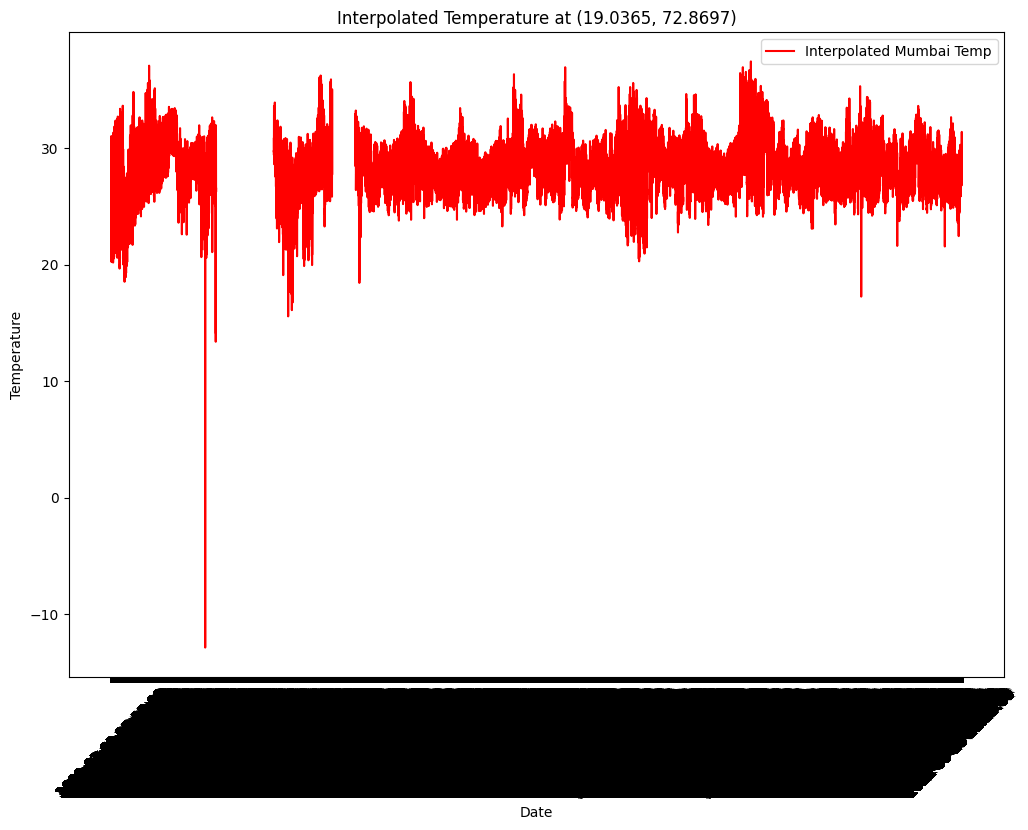

Plot saved as temperature_plot_20241216_091227.png


In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

# First plot: Interpolated Temperature vs Time
plt.subplot(2, 2, 1)
plt.plot(data_df.iloc[:, 0], data_df['Interpolated_Temperature'], label='Interpolated Mumbai Temp', color='red')
plt.title('Interpolated Temperature at (19.0365, 72.8697)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=45)

# You can add more subplots or complete the visualization as needed
plt.tight_layout()

# Save the plot as a PNG file with a dynamic filename based on the current timestamp or other factors
plot_filename = f"temperature_plot_{start_time.strftime('%Y%m%d_%H%M%S')}.png"
plt.savefig(plot_filename)

# Show the plot
plt.show()

print(f"Plot saved as {plot_filename}")
